### Time Series - Pandas

We will first look into developing a datetime object with pandas and datetime module

In [136]:
# importing libraries
from datetime import datetime
import pandas as pd 
%matplotlib inline

In [137]:
# Creating variables for  datetime objects
my_year = 2023
my_month = 2
my_date = 22
my_hour = 9 
my_min = 20 
my_sec = 30

In [138]:
# creating the datetime object
my_date = datetime(my_year,my_month,my_date,my_hour,my_min,my_sec)
my_date

datetime.datetime(2023, 2, 22, 9, 20, 30)

In [139]:
# Typecasting
print(type(my_date))

<class 'datetime.datetime'>


In [140]:
# we can also extract , day , month , year etc from the date time object
print(f'my year is {my_date.year}')
print(f'my month is {my_date.month}')
print(f'my day is {my_date.day}')
print(f'my hour is {my_date.hour}')

my year is 2023
my month is 2
my day is 22
my hour is 9


In [141]:
# datetime indexing with pandas 
# here we are printing 10 data points with day level frequency and the ns means nano second level precision
print(pd.date_range('2023-01-01',periods=10,freq='D'))

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10'],
              dtype='datetime64[ns]', freq='D')


In [142]:
# converting string/lists into datetime object/index with pandas by providing formats
print('in here we are converting the data where the dates are given with consistent delimiter')
print(pd.to_datetime(['2/1/2019','3/1/2019'],format='mixed'))
print('in here we are converting the data where the dates are given with mixed delimiter')
print(pd.to_datetime(['2--1--2019','3/1/2019'],format='mixed'))

in here we are converting the data where the dates are given with consistent delimiter
DatetimeIndex(['2019-02-01', '2019-03-01'], dtype='datetime64[ns]', freq=None)
in here we are converting the data where the dates are given with mixed delimiter
DatetimeIndex(['2019-02-01', '2019-03-01'], dtype='datetime64[ns]', freq=None)


In [143]:
# developing a time series data with time data as index 
''' Index development ''' 
idx = pd.date_range('2023-01-01',periods = 10 , freq='D')
data = np.random.randn(10,2)
cols = ['A','B']
df = pd.DataFrame(data,index=idx,columns=cols)
df.head()

,A,B
2023-01-01,1.414040,-1.126636
2023-01-02,-0.153475,-0.651993
2023-01-03,0.317496,0.776019
2023-01-04,-1.005821,0.913421
2023-01-05,-1.117270,1.768191


### Time Series - Numpy

Now let's look into developing Datetime objet with numpy

In [144]:
import numpy as np

In [145]:
# first let's declare a numpy array as datetime object , in the output the D that is shown stands for day level precision of our data , we can change it to year/month as well
np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64')

array(['2023-10-15', '2023-10-19', '2023-10-18'], dtype='datetime64[D]')

In [146]:
# changing precision level to year/ Month
print(np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64[Y]'))
print(np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64[M]'))

['2023' '2023' '2023']
['2023-10' '2023-10' '2023-10']


In [147]:
# although we didn't provide hour in our data , numpy takes a default value of it if we try to call it with hour as below . h needs to be in small letter
print(np.array(['2023-10-15','2023-10-19','2023-10-18'],dtype='datetime64[h]'))

['2023-10-15T00' '2023-10-19T00' '2023-10-18T00']


In [148]:
# Now let's have a look on how we can create continuous date wise data with given interval
# just like above , we have to specify that on which input we are arrange the dates
# suppose we want a range of dates in that case after specifying the number of dates we will provide D as an argument in dtype , for M in months etc etc
print(np.arange('2023-01-01','2023-06-01',7,dtype='datetime64[D]'))
print(np.arange('2023-01-01','2024-06-01',1,dtype='datetime64[M]'))
print(np.arange('2012-01-01','2024-06-01',2,dtype='datetime64[Y]'))
print(np.arange('2023-01-01','2023-01-02',2,dtype='datetime64[h]'))

['2023-01-01' '2023-01-08' '2023-01-15' '2023-01-22' '2023-01-29'
 '2023-02-05' '2023-02-12' '2023-02-19' '2023-02-26' '2023-03-05'
 '2023-03-12' '2023-03-19' '2023-03-26' '2023-04-02' '2023-04-09'
 '2023-04-16' '2023-04-23' '2023-04-30' '2023-05-07' '2023-05-14'
 '2023-05-21' '2023-05-28']
['2023-01' '2023-02' '2023-03' '2023-04' '2023-05' '2023-06' '2023-07'
 '2023-08' '2023-09' '2023-10' '2023-11' '2023-12' '2024-01' '2024-02'
 '2024-03' '2024-04' '2024-05']
['2012' '2014' '2016' '2018' '2020' '2022']
['2023-01-01T00' '2023-01-01T02' '2023-01-01T04' '2023-01-01T06'
 '2023-01-01T08' '2023-01-01T10' '2023-01-01T12' '2023-01-01T14'
 '2023-01-01T16' '2023-01-01T18' '2023-01-01T20' '2023-01-01T22']


#### Time Series - Resampling

We will now perform some resampling with our data which is similar to groupby function

In [149]:
# reading the data and setting the date column as index at once
df = pd.read_excel('.\Data\daily_datewise_bihar.xlsx',index_col='primary_lifting_date')
df1 = df.copy()
df.head()

,primary_lifting
primary_lifting_date,
2019-04-01,1.00
2019-04-02,1.00
2019-04-03,25.05
2019-04-04,1.00
2019-04-05,65.21


In [150]:
# resampling the data into monthly data and the aggregation function will be sum 
df.resample(rule='M').sum().head()

,primary_lifting
primary_lifting_date,
2019-04-30,1446.771
2019-05-31,1742.740
2019-06-30,1757.635
2019-07-31,1646.580
2019-08-31,2105.713


In [151]:
#resampling the data into yearly data and the aggregation function will be sum 
df.resample(rule='Y').sum().head()

,primary_lifting
primary_lifting_date,
2019-12-31,18058.335
2020-12-31,28628.593
2021-12-31,34369.621
2022-12-31,39992.407
2023-12-31,29747.576


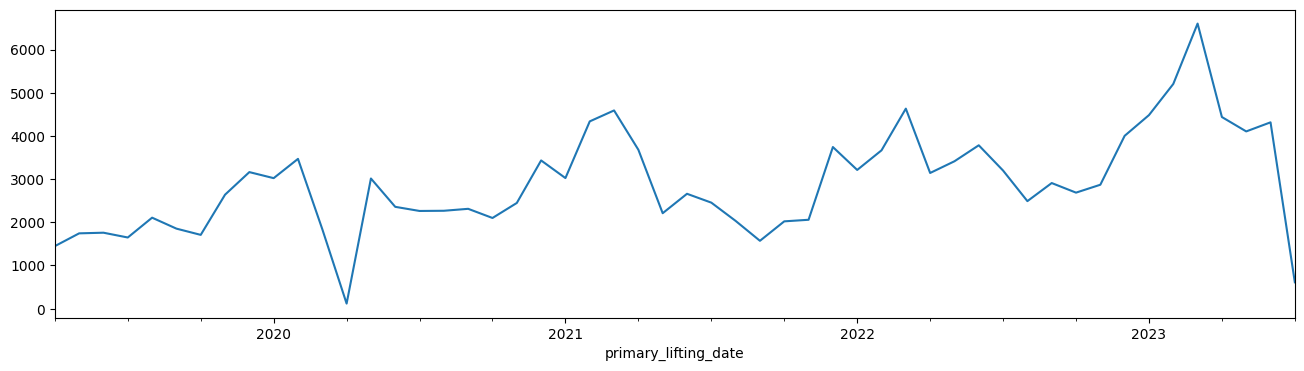

In [152]:
# plotting the daily data with matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
df['primary_lifting'].resample('M').sum().plot.line(figsize=(16,4))
plt.show()

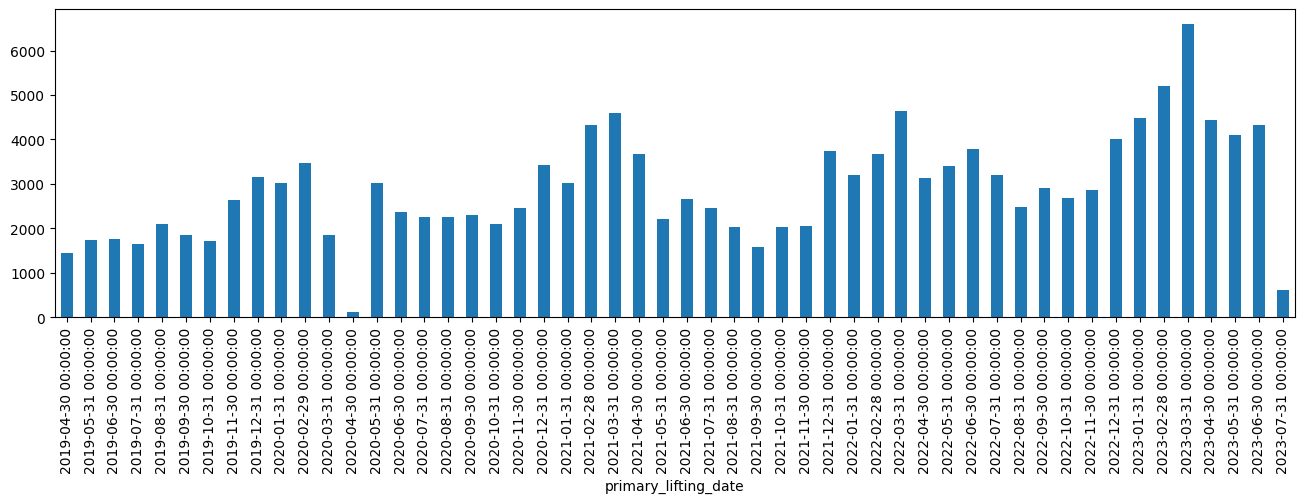

In [153]:
df['primary_lifting'].resample('M').sum().plot.bar(figsize=(16,4))
plt.show()

#### Rolling Window

The rolling feature takes specific window into consideration. It can be a 7 day , 30 day , 60 day window as per choice. Aggregation function like mean , sum , standard deviation etc works on this rolling window parameter. For example 

    -   We have a data for 365 days and each day sale
    -   If we consider a rolling mean with window size as 7 , it means every 7 days average is being taken into consderation from the start
    -   As the window size is 7 hence (7-1) = 6 values will be present as nan in the begining of the data. from 7th data point we will be able to see the average for last 7 days
    -   With window size as 30 the same concept above will be applicable with first to 29th data point being nan.

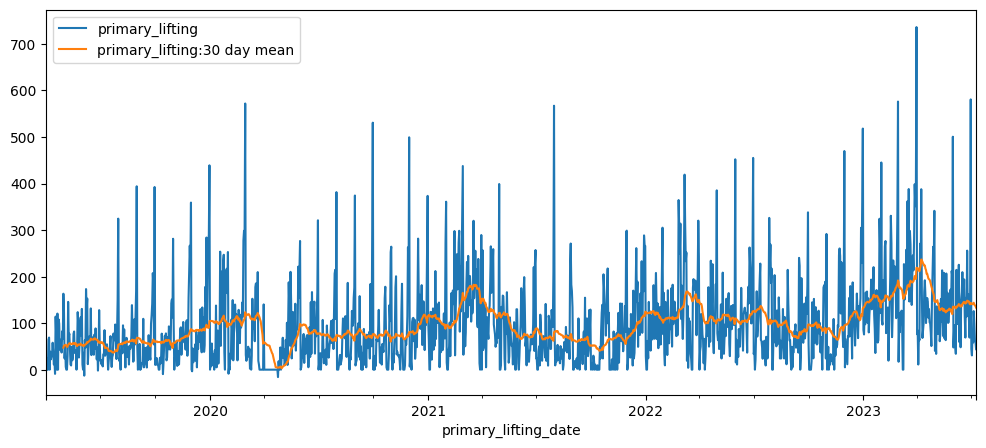

In [154]:
# let's plot a 30 day rolling average window as a new column and plot the same along with original data

df['primary_lifting:30 day mean'] = df['primary_lifting'].rolling(window=30).mean()
df[['primary_lifting','primary_lifting:30 day mean']].plot(figsize=(12,5))
plt.show()

#### Expanding

Unlike rolling , expanding doesn't take a specific window into considertion while plotting the data , instead it create specific data points and before those data points every value that's present , exapnding calculate the aggregate value of them as per our given aggregation function

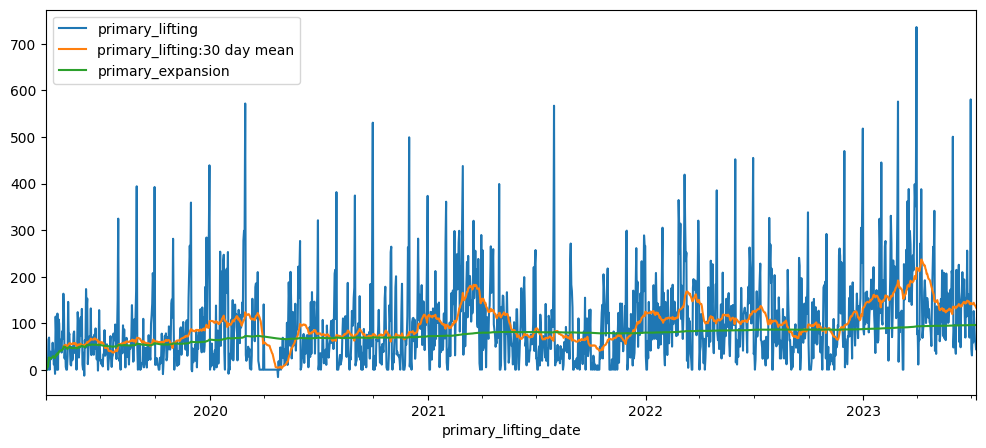

In [158]:
df['primary_lifting:30 day mean'] = df['primary_lifting'].rolling(window=30).mean()
df['primary_expansion'] = df['primary_lifting'].expanding().mean()
df[['primary_lifting','primary_lifting:30 day mean','primary_expansion']].plot(figsize=(12,5))
plt.show()

In [161]:
# let's visualize our data with title , xlabel and ylabel
title = 'Title'
xlabel = 'Xlabel'
ylabel = 'Ylabel'

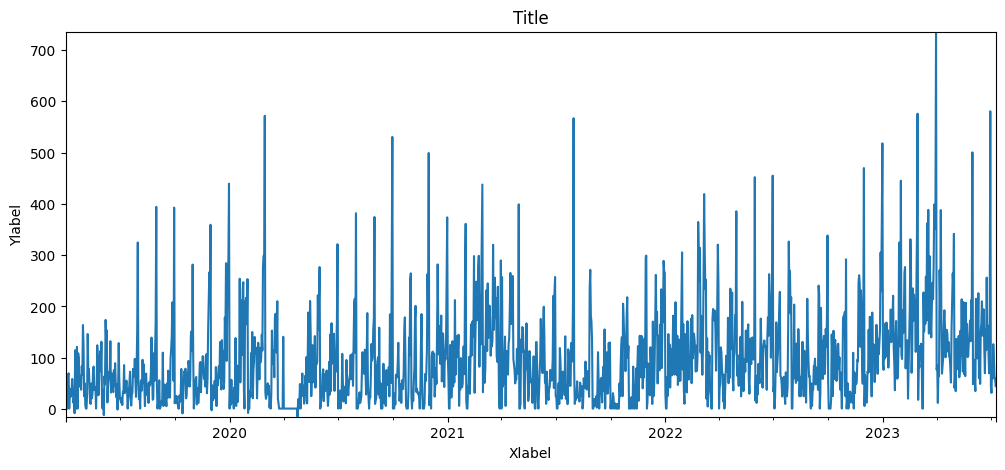

In [163]:
# setting up the axis first to assign x and ylabel to it , autoscaling removes any white space above and below the extreme data point in both x and y axis 
ax = df1['primary_lifting'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel) ;